<center>
    
# Software Entropy and Failure
#### Journal Club 2024-03-01

</center>

__Challenge__

- We have many software heuristics when it comes to best practices.
- How can we quantify and scientifically improve upon these practices (within the context of avoiding failures)?

In [1]:
# slide diagram preparations
import pathlib

import requests
from IPython.display import SVG

# create an images dir
pathlib.Path("images").mkdir(exist_ok=True)


def render_mermaid_diagram(mermaid_code, filename, filedir="images"):
    """
    Saves and renders SVG of Mermaid diagram using Kroki service.
    """
    response = requests.post(
        "https://kroki.io/",
        json={
            "diagram_source": mermaid_code,
            "diagram_type": "mermaid",
            "output_format": "svg",
        },
    )

    if response.status_code == 200:
        decoded = response.content.decode("utf-8")
        with open(f"{filedir}/{filename}", mode="w") as file:
            file.write(decoded)
        return SVG(decoded)
    else:
        return f"Failed to render diagram. Status code: {response.status_code}"

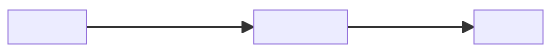

In [2]:
render_mermaid_diagram(
    """
    flowchart LR
        software["Software"] --> | changes include\nvarying | complexity
        complexity --> | which may\ncause | failures
    """,
    "title_understanding.svg",
)

__Journal article focus__

![](images/title_understanding.svg)

A. E. Hassan, __"Predicting faults using the complexity of code changes"__.

DOI: [10.1109/ICSE.2009.5070510](https://doi.org/10.1109/ICSE.2009.5070510)


__Title definitions__

- __Faults__: _"In document ISO 10303-226, a fault is defined as an abnormal condition or defect at the component, equipment, or sub-system level which may lead to a failure."_ ([Wikipedia: Fault (technology)](https://en.wikipedia.org/wiki/Fault_(technology)))
- __Complexity__: "... _un-certainty/randomness/complexity_ ..." (article Section 4)

__Complexity__

- Complexity as uncertainty or randomness may be understood as ___entropy___ from information theory.

__Complexity (information theory)__

_In information theory, the entropy of a __random variable__ is the __average level__ of __"information", "surprise", or "uncertainty"__ inherent to the variable's __possible outcomes__._

[Wikipedia: Entropy (information theory)](https://en.wikipedia.org/wiki/Entropy_(information_theory))



__Complexity (information theory)__

_Entropy: 1. A measure of the disorder present in a system._

[Wiktionary: Entropy](https://en.wiktionary.org/wiki/entropy)

__Complexity (information theory)__

Wait a minute, what even is "information" in this context?


__Complexity (information theory)__

<center>

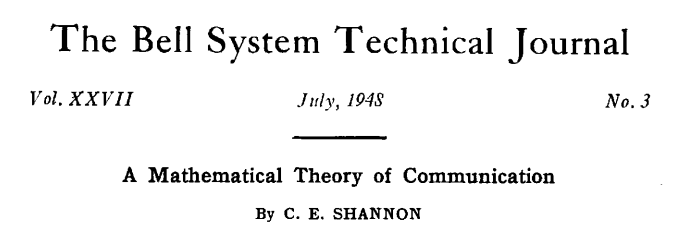

$$
I(E) = -\log_2(p(E))
$$

</center>

Information conveyed by an event or message is inversely proportional to its probability. That is, the less probable an event is, the more information it carries when it occurs.



__Complexity (information theory)__

<center>🪙</center>

Imagine a coin toss as a "message" with two equally probable outcomes.

In [3]:
import math

# Probability of each outcome for a fair coin toss
probability_heads = 0.5
probability_tails = 0.5

# Calculate Shannon information content for each outcome
information_heads = -math.log2(probability_heads)
information_tails = -math.log2(probability_tails)

print(f"Shannon information content for heads: {information_heads:.4f} bits")
print(f"Shannon information content for tails: {information_tails:.4f} bits")

Shannon information content for heads: 1.0000 bits
Shannon information content for tails: 1.0000 bits


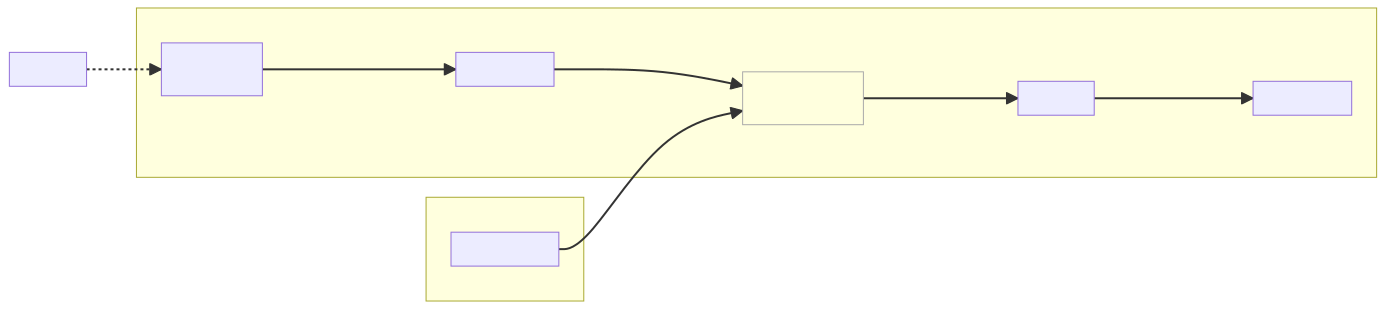

In [4]:
render_mermaid_diagram(
    """
flowchart LR

message["message"]
subgraph info_system["Information communication"]
message_source["Information\nsource"]
message_transmitter["Transmitter"]
noise_intersection["message noise\nintersection"]
message_receiver["Receiver"]
message_destination["Destination"]
end

subgraph noise_system["Noise generation"]
noise_source["Noise source"]
end

message -.-> message_source
message_source --> | shares message\nthrough | message_transmitter
message_transmitter --> | sends message\nfor receival | noise_intersection
noise_source --> | noise added\nto message | noise_intersection
noise_intersection --> | noisy message\nreceived by | message_receiver
message_receiver --> | sends message\nto | message_destination

style noise_intersection fill:transparent,stroke:#aaa,stroke-width:1px
    """,
    "shannon_information_communication.svg",
)

__Complexity (information theory)__

<center>

![](images/shannon_information_communication.svg)

Entropy:

$$
H(X) = -\sum_{x \in \mathcal{X}} p(x) \log_2 p(x)
$$

</center>

As understood through Shannon's communication system.

In [5]:
import math

# Probability of each outcome for a fair coin toss
probability_heads = 0.5
probability_tails = 0.5

# Calculate Shannon entropy for the coin toss
entropy = -(
    probability_heads * math.log2(probability_heads)
    + probability_tails * math.log2(probability_tails)
)

print(f"Shannon entropy for the fair coin toss: {entropy:.4f} bits")
print(
    "\nThe result can be understood as 'maximum uncertainty' as it's completely unpredictable (equal probabilities)."
)

Shannon entropy for the fair coin toss: 1.0000 bits

The result can be understood as 'maximum uncertainty' as it's completely unpredictable (equal probabilities).


In [6]:
import math

# Probabilities for the unfair coin toss
probability_heads = 0.3
probability_tails = 0.7

# Information content for heads and tails
information_heads = -math.log2(probability_heads)
information_tails = -math.log2(probability_tails)

# Entropy calculation
entropy = -(
    probability_heads * math.log2(probability_heads)
    + probability_tails * math.log2(probability_tails)
)

print(f"Information content for heads: {information_heads:.4f} bits")
print(f"Information content for tails: {information_tails:.4f} bits")
print(f"Entropy for the unfair coin toss: {entropy:.4f} bits")
print(
    "\nWe have more information from heads as it's less likely. We have less information from tails as it's more likely. We have less entropy because the outcome is more predictable."
)

Information content for heads: 1.7370 bits
Information content for tails: 0.5146 bits
Entropy for the unfair coin toss: 0.8813 bits

We have more information from heads as it's less likely. We have less information from tails as it's more likely. We have less entropy because the outcome is more predictable.


__Complexity (information theory)__

Questions in the context of software:

- What are the software "messages"?
- What are the software "probabilities"?

__Prior work with Software Failures and Complexity Measures__

Mentioned in the article:

- Prior modifications to a file are a good predictor of its fault potential (i.e., the more a file is changed, the more likely it will contain faults).

- Most code complexity metrics highly correlate with LOC (lines of code), a much simpler metric.

- Process metrics outperform code metrics as predictors of future faults.

- Prior faults are good predictors of future faults.

__"Predicting faults using the complexity of code changes" Conjecture__

- _A complex code change process negatively affects its product, the software system._
- _The more complex changes to a file, the higher the chance the file will contain faults._

__Section 4: Basic Code Change Model (BCC)__

<center>

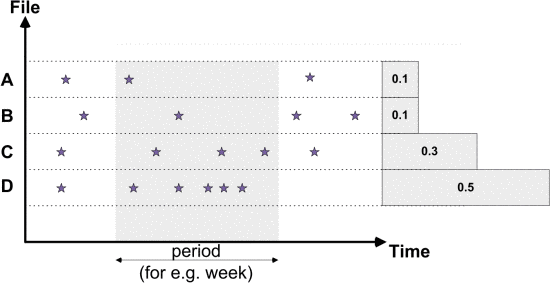

</center>

- FI modifications context (file interactions?)
- Files A, B, C, D are part of a software system.
- Stars are when changes occur to the files over a certain time period (such as a week).
- __P__ gives the probability that a file is changed in a period.

__Section 4: Basic Code Change Model (BCC)__

<center>

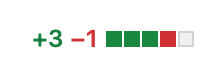

</center>

- Instead of solely using the number of changes to the file, lines added or removed are summed to help build additional detail for understanding the modifications.
- In the above example, we'd have a total of __4__ concerning the lines modified for a single file.

__Section 4: Basic Code Change Model (BCC)__

<center>

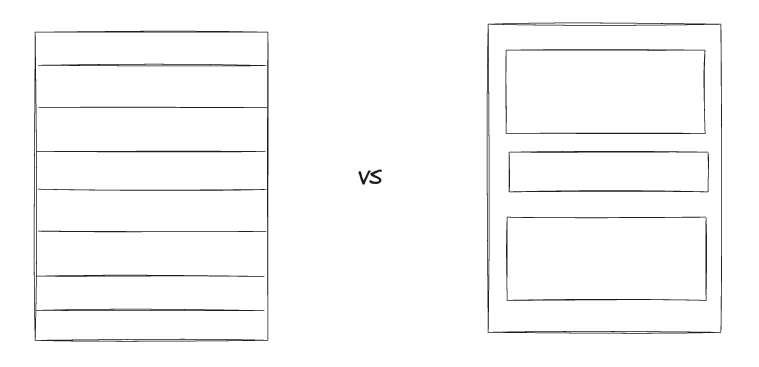

</center>

__Files vs internal modularity__

- _"... choice of files is based on the belief that a file is a conceptual unit of development where developers tend to group related entities such as functions and data types"_ (functions and other in-file modularity change based on language or style).

__Section 4: Basic Code Change Model (BCC)__

<center>

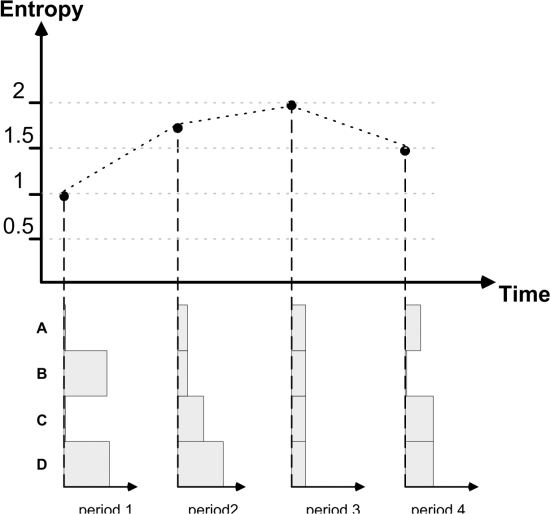

</center>

- Entropy as measured through 4 time periods for multiple files in a software system using modified lines.

__Section 4: Basic Code Change Model (BCC)__

<center>

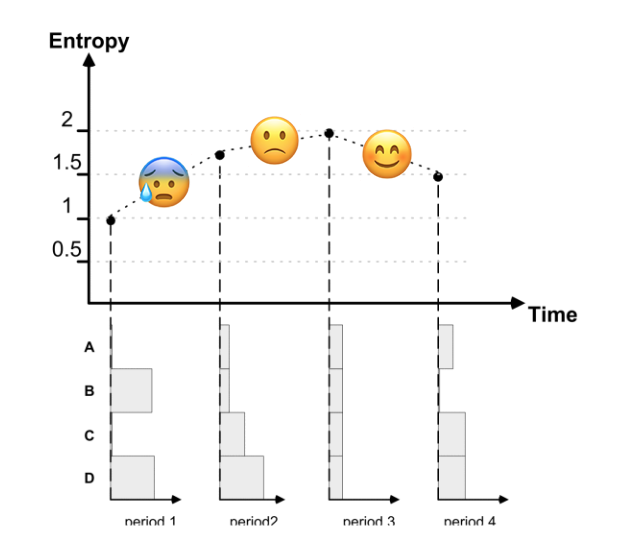

</center>


__Section 4: Basic Code Change Model (BCC)__

__Suggested conclusions__

- Monitoring for unexpected spikes in entropy and investigating the reasons behind them would let developers plan ahead and be ready for future problems.
- Would expect the entropy to remain high for a limited time period then to drop as the refactoring eases future modifications to the code
- Complex code base may cause a consistent rise in entropy over an extended period of time, until the issues causing the rise in change entropy/complexity are addressed and resolved

__Section 5: Extended Code Change Model (ECC)__

<center>

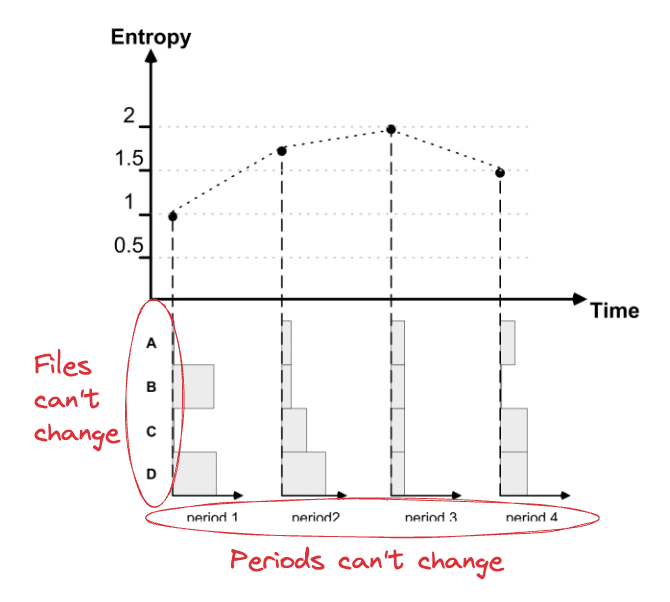

</center>

__Section 5: Extended Code Change Model (ECC)__

- The "basic" BCC model has limitations through static file count and time periods.
- As a result, we need to "extend" on the basic model.

__Section 5: Extended Code Change Model (ECC)__

<center>

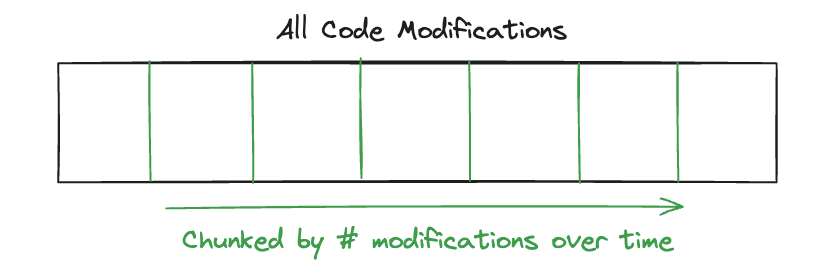

</center>

- Time "Evolution Periods" __Modification limit based periods__.
- Uses a certain number as a way to "chunk" by modifications over total time for the project.


__Section 5: Extended Code Change Model (ECC)__

<center>

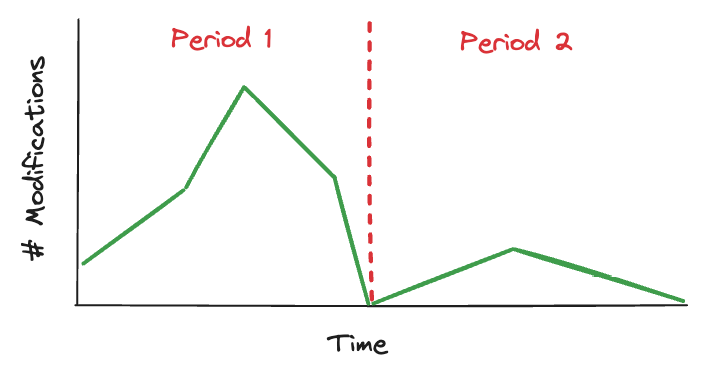

</center>

- Time "Evolution Periods" __Burst based periods__.
- Calculates dynamic periods based on modifications and time, segmenting by periods of modification vs none.

__Section 5: Extended Code Change Model (ECC)__

<center>

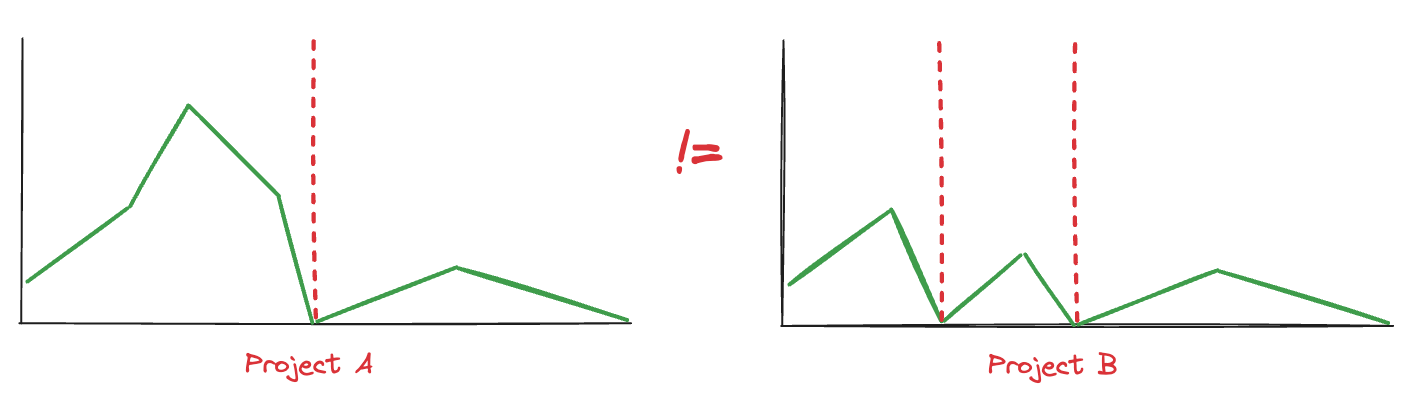

</center>

- We now have a way to use more dynamic time periods for code changes.
- However, Shannon entropy calculations don't inherently allow for comparisons between distributions of different sizes (each software project could have a different number of distributions or in this case time periods).

__Section 5: Extended Code Change Model (ECC)__

<center>

$$
H(P) = -\sum_{k=1}^{n}\left(p_{k} {\ast} \log_{n}p_{k}\right)
$$

</center>

- A __normalized static entropy__ is introduced to help with varying distribution sizes to enable software project cross-comparisons.

__Section 5: Extended Code Change Model (ECC)__

<center>

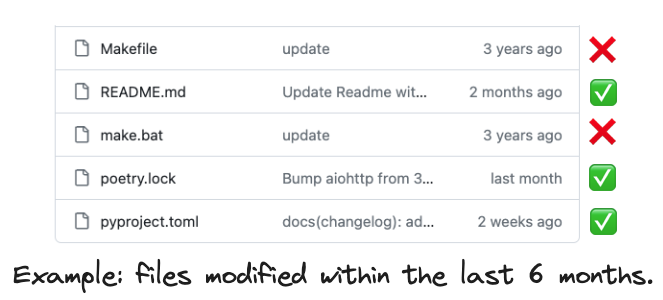

</center>

- Additionally, __adaptive sizing entropy__ ($H'$) is introduced.
- Adaptive sizing entropy includes only _recently_ modified files (relative to the project) to avoid discrepancies caused by rarely modified files.
- Recently can mean:
    -  __Time__: "modified within the last x months."
    -  __Previous periods__: "modified within the last x periods."

__Section 6: File Code Change Model__

<center>

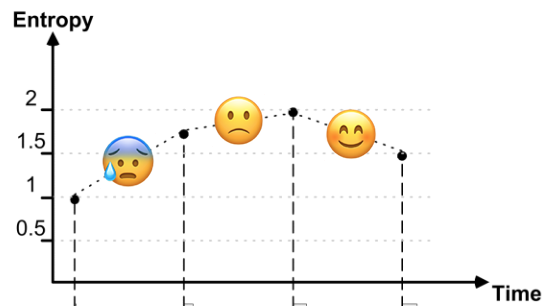

</center>

- __History Complexity Metric (HCM)__ is introduced.
- _"We believe that files that are modified during periods of high change complexity, as determined by our ECC Model, will have a higher tendency to contain faults."_


__History Complexity Metric (HCM)__

<center>

$$
HCM_{\{a,..,b\}}(j) = \sum_{i\in \{ a,..,b\}} HCPF_{i}(j)
$$

</center>

- HCM measures how files which have been modified during periods of high complexity/entropy will tend to be more prone to faults.
- HCM assigns to a file the effect of the change complexity of a period, as calculated by the ECC model.
- History Complexity Period Factor ($HCPFi$) is calculated for each file per time period.


__History Complexity Period Factor (HCPFi)__

<center>

$$
HCPF_{i}(j)=\cases{ c_{ij}{\ast} H_{i}, &$j\in F_{i}$\cr 0, &$otherwise$}
$$

</center>

- History Complexity Period Factor ($HCPFi$) is calculated for each file per time period.